In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import vcf
import io
%matplotlib inline

In [5]:
pwd

'/Users/davidchen/Documents/COVID-19_Mutation_signature'

# Function to read in VCF as a dataframe

In [6]:
def read_vcf(path):
    with open(path, 'r') as f:
        lines = [l for l in f if not l.startswith('##')]
    return pd.read_csv(
        io.StringIO(''.join(lines)),
        dtype={'#CHROM': str, 'POS': int, 'ID': str, 'REF': str, 'ALT': str,
               'QUAL': str, 'FILTER': str, 'INFO': str},
        sep='\t'
    ).rename(columns={'#CHROM': 'CHROM'})

In [11]:
df = read_vcf("/Users/davidchen/Documents/COVID-19_Mutation_signature/G/G_09_2020_snps.vcf")

In [12]:
df

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,NC_045512.2,...,hCoV-19/England/ALDP-9813C9/2020|EPI_ISL_529545|2020-08-09,hCoV-19/England/ALDP-981666/2020|EPI_ISL_529546|2020-08-08,hCoV-19/England/ALDP-981CA0/2020|EPI_ISL_529547|2020-08-09,hCoV-19/England/ALDP-981FA7/2020|EPI_ISL_529549|2020-08-09,hCoV-19/England/QEUH-96DF74/2020|EPI_ISL_530511|2020-08-18,hCoV-19/England/QEUH-96F15E/2020|EPI_ISL_530514|2020-08-15,hCoV-19/England/QEUH-96EBAC/2020|EPI_ISL_530515|2020-08-19,hCoV-19/England/QEUH-96F2B5/2020|EPI_ISL_530516|2020-08-17,hCoV-19/England/QEUH-96DED1/2020|EPI_ISL_530518|2020-08-18,hCoV-19/England/QEUH-96EE67/2020|EPI_ISL_530520|2020-08-19
0,1,343,.,G,"T,A",.,.,.,GT,0,...,0,0,0,0,0,0,0,0,0,0
1,1,346,.,C,T,.,.,.,GT,0,...,0,0,0,0,0,0,0,0,0,0
2,1,363,.,A,G,.,.,.,GT,0,...,0,0,0,0,0,0,0,0,0,0
3,1,365,.,T,A,.,.,.,GT,0,...,0,0,0,0,0,0,0,0,0,0
4,1,367,.,C,T,.,.,.,GT,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,1,29037,.,C,T,.,.,.,GT,0,...,0,0,0,0,0,0,0,0,0,0
2096,1,29317,.,T,C,.,.,.,GT,0,...,0,0,0,0,0,0,0,0,0,0
2097,1,29332,.,G,T,.,.,.,GT,0,...,0,0,0,0,0,0,0,0,0,0
2098,1,29342,.,A,G,.,.,.,GT,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
df.shape

(2100, 14944)

# Function to filter VCF data to retrieve only variants with a minimum alternate allele frequency

In [40]:
def filter_vcf(path, aaf_limit):
    
    vcf_reader = vcf.Reader(open(str(path), 'r'))
  
    total = []
    position = []
    ref = []
    alt = []
    
    for record in vcf_reader:
        total.append(record.POS)
        if aaf_limit > 0:
            if record.aaf[0] > aaf_limit:
                position.append(record.POS)
                ref.append(record.REF)
                alt.append(record.ALT)
            else:
                pass
        else:
            position.append(record.POS)
            ref.append(record.REF)
            alt.append(record.ALT)
    
    if aaf_limit > 0:
        data = pd.DataFrame(columns=["position", "reference", "alternate"])
        data["position"] = position
        data["reference"] = ref
        data["alternate"] = alt
    else:
        data = pd.DataFrame(columns=["total", "reference", "alternate"])
        data["total"] = position
        data["reference"] = ref
        data["alternate"] = alt
        
    return data

# Retrieved only variants with a minimum alternate allele frequency of 0.5% (~5/2000)

In [54]:
filtered_df = filter_vcf("/Users/davidchen/Documents/COVID-19_Mutation_signature/G/G_09_2020_snps.vcf", aaf_limit=0.0025)
filtered_df

,position,reference,alternate
0,854,C,[T]
1,904,C,[T]
2,940,G,[A]
3,1150,C,[T]
4,1163,A,"[T, G]"
...,...,...,...
64,28860,A,[G]
65,28881,G,[A]
66,28882,G,[A]
67,28883,G,[C]


# Genomic distance between unfiltered variant bases

In [16]:
distance = [0]
for i in range(1, len(df)):
    distance.append(df.iloc[i,1] - df.iloc[i-1,1])

In [26]:
plt.style.use('ggplot') 

# Rainfall plot of unfiltered variant data

Many possible variant bases are visualized, but some of these variant bases could be sequencing artifacts or errors that require filtering to only include true SNPs.

Text(0, 0.5, 'Genomic Distance')

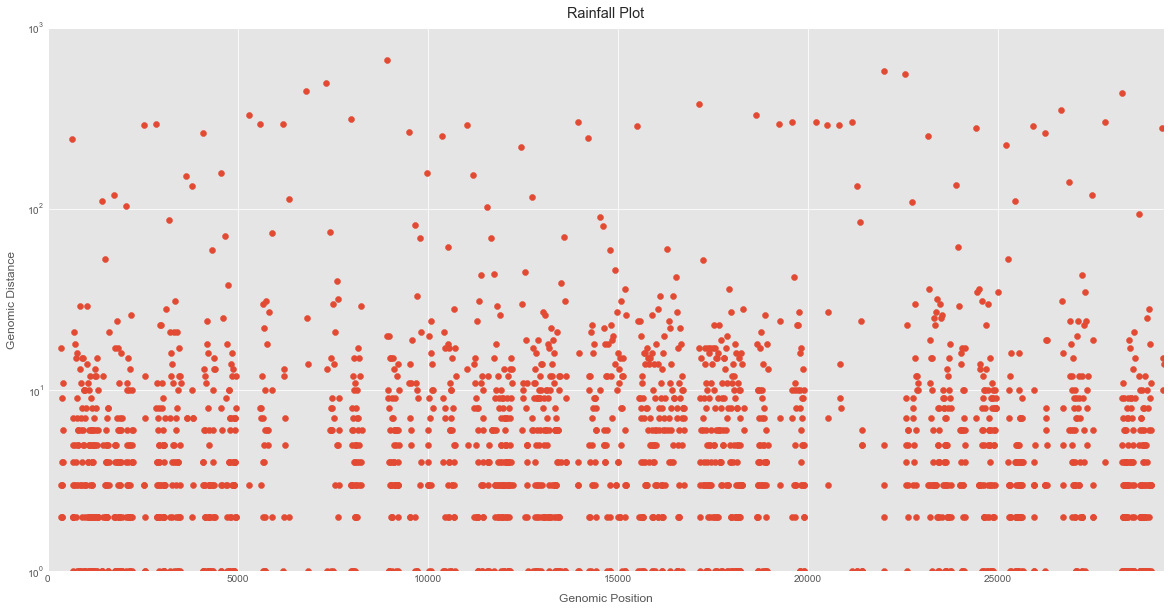

In [47]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(df["POS"], distance)
ax.set_yscale("log")
ax.set_xlim([0, 29356])
ax.set_ylim([1, 1000])
ax.set_title("Rainfall Plot", pad=10)
ax.set_xlabel("Genomic Position", labelpad=10)
ax.set_ylabel("Genomic Distance", labelpad=10)

# Genomic distance between filtered variant bases with a minimum AAf of 0.25%

In [55]:
filtered_distance = [0]
for i in range(1, len(filtered_df)):
    filtered_distance.append(filtered_df.iloc[i,0] - filtered_df.iloc[i-1,0])

# Rainfall plot of filtered variant data

Very sparse number of variant bases due to very short virus sequence. 

Text(0, 0.5, 'Genomic Distance')

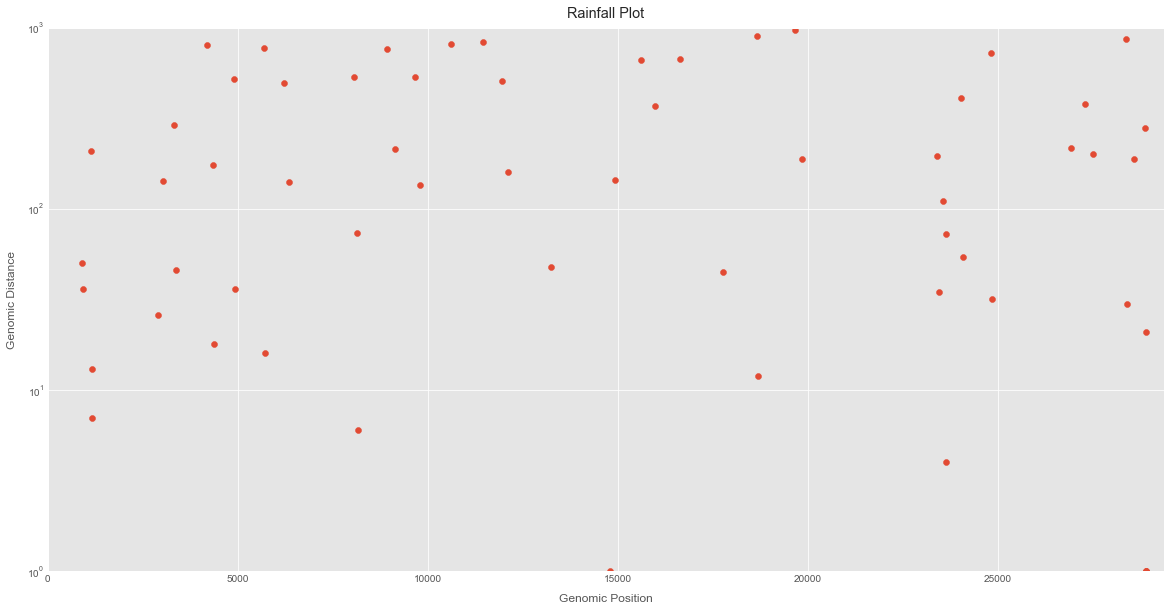

In [56]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(filtered_df["position"], filtered_distance)
ax.set_yscale("log")
ax.set_xlim([0, 29356])
ax.set_ylim([1, 1000])
ax.set_title("Rainfall Plot", pad=10)
ax.set_xlabel("Genomic Position", labelpad=10)
ax.set_ylabel("Genomic Distance", labelpad=10)